In [1]:
import cv2 
import os
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D ,BatchNormalization
from tensorflow.keras import regularizers

In [2]:
data = np.load('data.npy')
target = np.load('target.npy')

In [3]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target = train_test_split(data,target,test_size=0.2,random_state=42)

In [4]:
img_size = 100
model = Sequential()

model.add(Conv2D(32,(3,3), padding='same',input_shape=(img_size, img_size, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(128,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))


In [5]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 activation (Activation)     (None, 100, 100, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 32)     400       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 33, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 33, 33, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 33, 33, 64)        1

In [6]:
save = model.fit(train_data,train_target,batch_size=64,validation_data=(test_data,test_target),epochs=40,verbose=1)

Epoch 1/40
104/104 [==============================] - 305s 3s/step - loss: 0.7994 - accuracy: 0.6261 - val_loss: 1.3398 - val_accuracy: 0.4185
Epoch 2/40
104/104 [==============================] - 275s 3s/step - loss: 0.6694 - accuracy: 0.6748 - val_loss: 1.2307 - val_accuracy: 0.4185
Epoch 3/40
104/104 [==============================] - 265s 3s/step - loss: 0.5815 - accuracy: 0.7313 - val_loss: 0.9343 - val_accuracy: 0.4402
Epoch 4/40
104/104 [==============================] - 257s 2s/step - loss: 0.4766 - accuracy: 0.7883 - val_loss: 1.4377 - val_accuracy: 0.4191
Epoch 5/40
104/104 [==============================] - 256s 2s/step - loss: 0.3535 - accuracy: 0.8542 - val_loss: 0.3069 - val_accuracy: 0.8750
Epoch 6/40
104/104 [==============================] - 257s 2s/step - loss: 0.2889 - accuracy: 0.8807 - val_loss: 0.2747 - val_accuracy: 0.8895
Epoch 7/40
104/104 [==============================] - 274s 3s/step - loss: 0.2255 - accuracy: 0.9082 - val_loss: 0.2755 - val_accuracy: 0.8865

In [7]:
model.save('GenderDetecter1.h5')

In [8]:
save.history

{'loss': [0.7993841767311096,
  0.6693930625915527,
  0.5815273523330688,
  0.47658398747444153,
  0.3534509837627411,
  0.2889426648616791,
  0.2254870980978012,
  0.18110628426074982,
  0.1562129557132721,
  0.1508665233850479,
  0.11271749436855316,
  0.1207156553864479,
  0.08439542353153229,
  0.09274324029684067,
  0.08725805580615997,
  0.07376961410045624,
  0.060873404145240784,
  0.04656171426177025,
  0.04960343986749649,
  0.04256005957722664,
  0.05957452207803726,
  0.033090557903051376,
  0.04044943302869797,
  0.03957092761993408,
  0.03615571931004524,
  0.03981220722198486,
  0.029312431812286377,
  0.026619141921401024,
  0.028604701161384583,
  0.02632632851600647,
  0.024645870551466942,
  0.026246048510074615,
  0.07175567001104355,
  0.05078011378645897,
  0.08378125727176666,
  0.03546351566910744,
  0.02358591929078102,
  0.017482124269008636,
  0.020965442061424255,
  0.021259404718875885],
 'accuracy': [0.6260567903518677,
  0.6748188138008118,
  0.7312802076

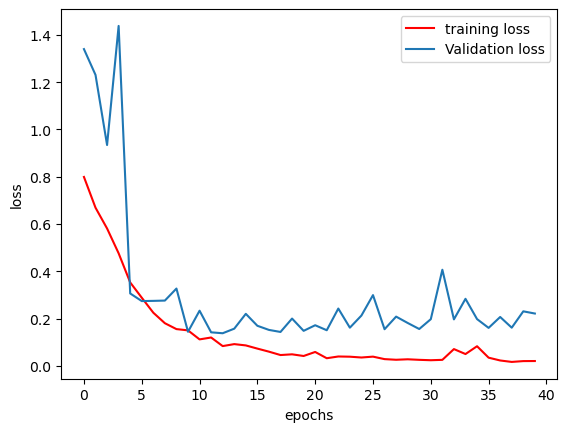

In [9]:
from matplotlib import pyplot as plt

plt.plot(save.history['loss'],'r',label='training loss')
plt.plot(save.history['val_loss'],label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

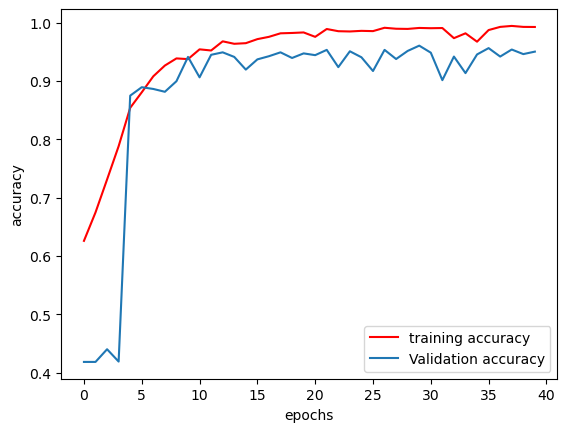

In [10]:
plt.plot(save.history['accuracy'],'r',label='training accuracy')
plt.plot(save.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()